In [8]:
import pandas as pd

In [9]:
file_url = 's3://capstone-techcatalyst-raw/More NYC Taxi/Additional NYC Data/Construction-Related_Incidents_20250809.csv'

In [10]:
from dotenv import load_dotenv

load_dotenv()

True

In [20]:
df = pd.read_csv(file_url)

In [12]:
df.describe()

,BIN,Accident Report ID,Fatality,Injury,Block,Lot,Postcode,Latitude,Longitude,Community Board,Council District,BBL,Census Tract (2020)
count,9.080000e+02,911.000000,911.000000,911.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,8.800000e+02,908.000000
mean,2.453678e+06,43709.439078,0.014270,0.784852,2300.046256,412.516520,10656.104626,40.733592,-73.952269,231.864537,20.278634,2.268063e+09,6212.377753
std,1.287157e+06,642.558217,0.118667,0.498163,2409.614746,1631.176112,571.317282,0.065751,0.051848,115.407252,15.380528,1.170113e+09,16604.284155
min,1.000007e+06,42646.000000,0.000000,0.000000,1.000000,1.000000,10001.000000,40.553156,-74.162337,101.000000,1.000000,1.000010e+09,2.000000
25%,1.082967e+06,43185.000000,0.000000,1.000000,809.750000,7.000000,10023.000000,40.689356,-73.986290,106.000000,4.000000,1.012750e+09,101.000000
50%,2.815372e+06,43639.000000,0.000000,1.000000,1512.500000,25.000000,10468.000000,40.740742,-73.963608,211.500000,17.000000,2.041340e+09,299.000000
75%,3.429267e+06,44244.500000,0.000000,1.000000,2856.000000,51.000000,11216.250000,40.765724,-73.927449,309.000000,35.000000,3.036920e+09,1902.000000
max,5.175835e+06,44887.000000,1.000000,5.000000,16188.000000,9010.000000,11694.000000,40.896116,-73.750419,503.000000,51.000000,5.054870e+09,107001.000000


<Axes: title={'center': 'Accidents by Borough'}, xlabel='Borough'>

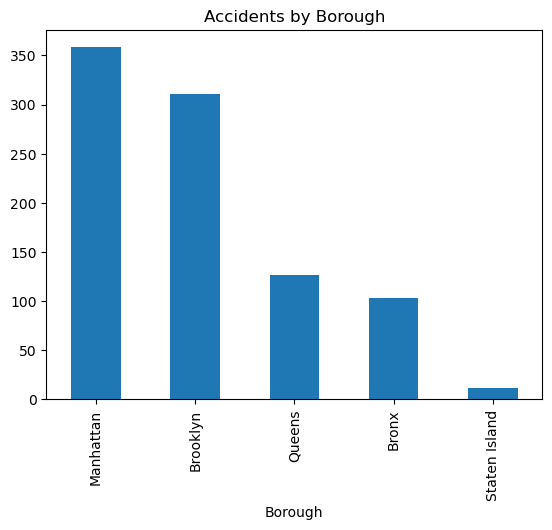

In [13]:
df['Borough'].value_counts().plot(kind='bar', title='Accidents by Borough')

<Axes: title={'center': 'Accidents Over Time'}, xlabel='Year'>

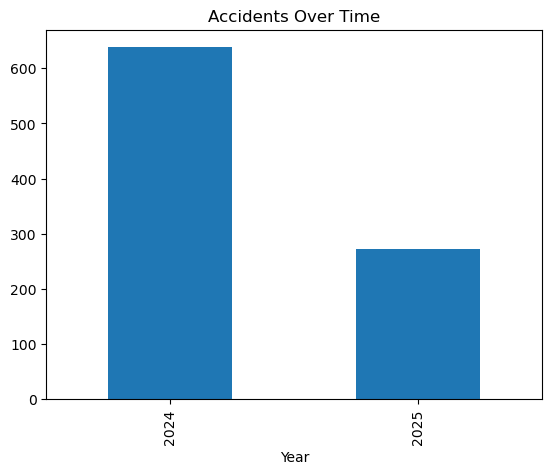

In [ ]:
df['Incident Date'] = pd.to_datetime(df['Incident Date'])
df['Year'] = df['Incident Date'].dt.year
df['Year'].value_counts().sort_index().plot(kind='bar', title='Accidents Over Time')


<Axes: title={'center': 'Fatal vs Non-Fatal Accidents'}, xlabel='Fatality'>

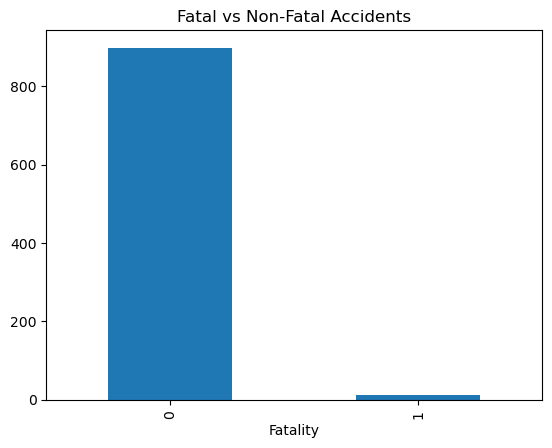

In [15]:
df['Fatality'].value_counts().plot(kind='bar', title='Fatal vs Non-Fatal Accidents')


In [21]:
df.isnull().sum()

BIN                                           3
Accident Report ID                            0
Incident Date                                 0
Record Type Description                       0
Check2 Description                            0
Fatality                                      0
Injury                                        0
House Number                                  0
Street Name                                   0
Borough                                       0
Block                                         3
Lot                                           3
Postcode                                      3
Latitude                                      3
Longitude                                     3
Community Board                               3
Council District                              3
BBL                                          31
Census Tract (2020)                           3
Neighborhood Tabulation Area (NTA) (2020)     3
dtype: int64

In [11]:
df2 = pd.read_csv('s3://capstone-techcatalyst-raw/More NYC Taxi/Additional NYC Data/Motor_Vehicle_Collisions_-_Crashes_20250809.csv')

/tmp/ipykernel_11469/3877851914.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv('s3://capstone-techcatalyst-raw/More NYC Taxi/Additional NYC Data/Motor_Vehicle_Collisions_-_Crashes_20250809.csv')


In [12]:
df2.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
2,11/01/2023,1:29,BROOKLYN,11230.0,40.62179,-73.970024,"(40.62179, -73.970024)",OCEAN PARKWAY,AVENUE K,NaN,...,Unspecified,Unspecified,NaN,NaN,4675373,Moped,Sedan,Sedan,NaN,NaN
3,06/29/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
4,09/21/2022,13:21,NaN,NaN,NaN,NaN,NaN,BROOKLYN BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4566131,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN


In [16]:
df2.columns


Index(['CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME',
       'OFF STREET NAME', 'NUMBER OF PERSONS INJURED',
       'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
       'COLLISION_ID', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
       'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5'],
      dtype='object')

In [18]:
df2['NUMBER OF PERSONS KILLED'].value_counts()

NUMBER OF PERSONS KILLED
0.0    2193418
1.0       3198
2.0         87
3.0         13
4.0          4
5.0          2
8.0          1
Name: count, dtype: int64

<Axes: xlabel='NUMBER OF PERSONS KILLED'>

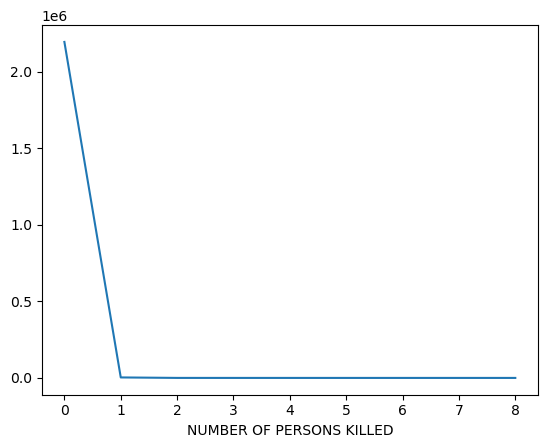

In [23]:
df2['NUMBER OF PERSONS KILLED'].value_counts().plot()

In [ ]:

person_collision = pd.read_csv('s3://capstone-techcatalyst-raw/More NYC Taxi/Additional NYC Data/Motor_Vehicle_Collisions_-_Person_20250809.csv')

: 

In [2]:
import duckdb 
con = duckdb.connect("sample.duckdb")

In [3]:
con.sql("INSTALL httpfs;")
con.sql("LOAD httpfs;")

In [4]:
con.sql("""
  CREATE OR REPLACE SECRET my_s3 (
    TYPE s3,
    PROVIDER credential_chain
  );
""")

┌─────────┐
│ Success │
│ boolean │
├─────────┤
│ true    │
└─────────┘

In [6]:
df = con.sql("SELECT * FROM read_csv('s3://capstone-techcatalyst-raw/More NYC Taxi/Additional NYC Data/Motor_Vehicle_Collisions_-_Person_20250809.csv')")

In [7]:
df

┌───────────┬──────────────┬────────────┬────────────┬──────────────────────────────────────┬─────────────┬───────────────┬────────────┬────────────┬─────────────┬──────────────────┬──────────────────────┬──────────────────────────────────────────────────────────────────────────────────────┬────────────────────┬───────────────────────────────────────────────────────┬──────────────────────┬─────────────────────────────┬─────────────────┬───────────────────────┬───────────────────────┬────────────┐
│ UNIQUE_ID │ COLLISION_ID │ CRASH_DATE │ CRASH_TIME │              PERSON_ID               │ PERSON_TYPE │ PERSON_INJURY │ VEHICLE_ID │ PERSON_AGE │  EJECTION   │ EMOTIONAL_STATUS │    BODILY_INJURY     │                                 POSITION_IN_VEHICLE                                  │  SAFETY_EQUIPMENT  │                     PED_LOCATION                      │      PED_ACTION      │          COMPLAINT          │    PED_ROLE     │ CONTRIBUTING_FACTOR_1 │ CONTRIBUTING_FACTOR_2 │ PERSON_SE

In [46]:
dfcar = con.sql("SELECT * FROM read_csv('s3://capstone-techcatalyst-raw/More NYC Taxi/Additional NYC Data/Motor_Vehicle_Collisions_-_Vehicles_20250809.csv')")

In [47]:
dfcar

┌───────────┬──────────────┬────────────┬────────────┬──────────────────────────────────────┬────────────────────┬─────────────────────────────────────┬────────────────┬───────────────┬──────────────┬──────────────────┬───────────────────┬────────────┬───────────────────────┬─────────────────────────────┬──────────────────────┬──────────────────────────┬──────────────────────────┬───────────────────────────┬────────────────────┬──────────────────────────┬────────────────────────┬─────────────────────────────┬────────────────────────────────┬───────────────────────┐
│ UNIQUE_ID │ COLLISION_ID │ CRASH_DATE │ CRASH_TIME │              VEHICLE_ID              │ STATE_REGISTRATION │            VEHICLE_TYPE             │  VEHICLE_MAKE  │ VEHICLE_MODEL │ VEHICLE_YEAR │ TRAVEL_DIRECTION │ VEHICLE_OCCUPANTS │ DRIVER_SEX │ DRIVER_LICENSE_STATUS │ DRIVER_LICENSE_JURISDICTION │      PRE_CRASH       │     POINT_OF_IMPACT      │      VEHICLE_DAMAGE      │     VEHICLE_DAMAGE_1      │  VEHICLE_DAMAGE_

In [59]:
con.sql("""
SELECT * FROM dfcar
WHERE COLLISION_ID > 8000
""")


┌───────────┬──────────────┬────────────┬────────────┬──────────────────────────────────────┬────────────────────┬─────────────────────────────────────┬────────────────┬───────────────┬──────────────┬──────────────────┬───────────────────┬────────────┬───────────────────────┬─────────────────────────────┬──────────────────────┬──────────────────────────┬──────────────────────────┬───────────────────────────┬──────────────────┬──────────────────┬────────────────────────┬─────────────────────────────┬────────────────────────────────┬───────────────────────┐
│ UNIQUE_ID │ COLLISION_ID │ CRASH_DATE │ CRASH_TIME │              VEHICLE_ID              │ STATE_REGISTRATION │            VEHICLE_TYPE             │  VEHICLE_MAKE  │ VEHICLE_MODEL │ VEHICLE_YEAR │ TRAVEL_DIRECTION │ VEHICLE_OCCUPANTS │ DRIVER_SEX │ DRIVER_LICENSE_STATUS │ DRIVER_LICENSE_JURISDICTION │      PRE_CRASH       │     POINT_OF_IMPACT      │      VEHICLE_DAMAGE      │     VEHICLE_DAMAGE_1      │ VEHICLE_DAMAGE_2 │ VEHICLE

In [41]:
con.sql("SELECT * FROM dfcar WHERE COLLISION_ID = 3434155")





ConversionException: Conversion Error: CSV Error on Line: 24656
Original Line: 17378704,3518367,09/12/2016,14:26,783588,NY,Bus,"IC, YELLOW BUS(OMNIBUS)",,2006,Southwest,1,M,Licensed,NY,Making Right Turn,Left Rear Bumper,No Damage,,,,N,,Turning Improperly,Unspecified
Error when converting column "VEHICLE_OCCUPANTS". Could not convert string "Southwest" to 'BIGINT'

Column VEHICLE_OCCUPANTS is being converted as type BIGINT
This type was auto-detected from the CSV file.
Possible solutions:
* Override the type for this column manually by setting the type explicitly, e.g. types={'VEHICLE_OCCUPANTS': 'VARCHAR'}
* Set the sample size to a larger value to enable the auto-detection to scan more values, e.g. sample_size=-1
* Use a COPY statement to automatically derive types from an existing table.
* Check whether the null string value is set correctly (e.g., nullstr = 'N/A')

  file = s3://capstone-techcatalyst-raw/More NYC Taxi/Additional NYC Data/Motor_Vehicle_Collisions_-_Vehicles_20250809.csv
  delimiter = , (Auto-Detected)
  quote = \0 (Auto-Detected)
  escape = \0 (Auto-Detected)
  new_line = \n (Auto-Detected)
  header = true (Auto-Detected)
  skip_rows = 0 (Auto-Detected)
  comment = \0 (Auto-Detected)
  strict_mode = true (Auto-Detected)
  date_format = %m/%d/%Y (Auto-Detected)
  timestamp_format =  (Auto-Detected)
  null_padding = 0
  sample_size = 20480
  ignore_errors = false
  all_varchar = 0

